

####**In this lesson we'll learn:**
1. How to use the HSV Color Space to Filter by Color

#### **Remember The HSV Color Space**

![](https://answers.opencv.org/upfiles/15186766673210035.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

In [3]:
!pip install wget
!pip install zipfile36


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=68aae880b180c31c841f121a5736797a133854ab7100bbc318bd8304a6664067
  Stored in directory: /Users/tuchsanai/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [4]:
# download our images
import os
import wget
from zipfile import ZipFile


def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

URL = "https://github.com/Tuchsanai/DL-FOR-COMPUTER-VISION-2565_1/raw/main/week2/code/images.zip"

if not os.path.exists("images.zip"):
    wget.download(URL,bar=bar_custom)

if not os.path.exists("images"):
    with ZipFile('images.zip', 'r') as zipObj:
        # Extract all the contents of zip file in current directory
        zipObj.extractall()

Downloading: 0% [0 / 29586716] bytes
Downloading: 0% [8192 / 29586716] bytes
Downloading: 0% [16384 / 29586716] bytes
Downloading: 0% [24576 / 29586716] bytes
Downloading: 0% [32768 / 29586716] bytes
Downloading: 0% [40960 / 29586716] bytes
Downloading: 0% [49152 / 29586716] bytes
Downloading: 0% [57344 / 29586716] bytes
Downloading: 0% [65536 / 29586716] bytes
Downloading: 0% [73728 / 29586716] bytes
Downloading: 0% [81920 / 29586716] bytes
Downloading: 0% [90112 / 29586716] bytes
Downloading: 0% [98304 / 29586716] bytes
Downloading: 0% [106496 / 29586716] bytes
Downloading: 0% [114688 / 29586716] bytes
Downloading: 0% [122880 / 29586716] bytes
Downloading: 0% [131072 / 29586716] bytes
Downloading: 0% [139264 / 29586716] bytes
Downloading: 0% [147456 / 29586716] bytes
Downloading: 0% [155648 / 29586716] bytes
Downloading: 0% [163840 / 29586716] bytes
Downloading: 0% [172032 / 29586716] bytes
Downloading: 0% [180224 / 29586716] bytes
Downloading: 0% [188416 / 29586716] bytes
Downloadin

In [5]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


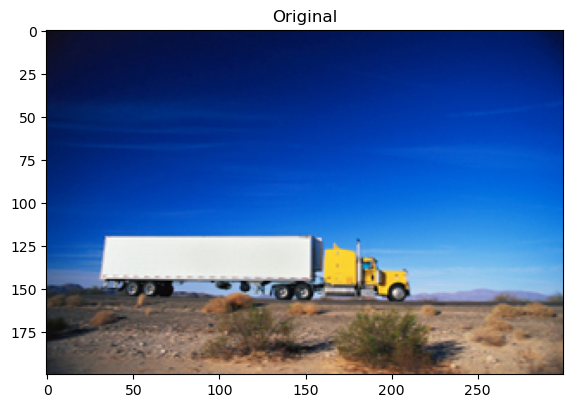

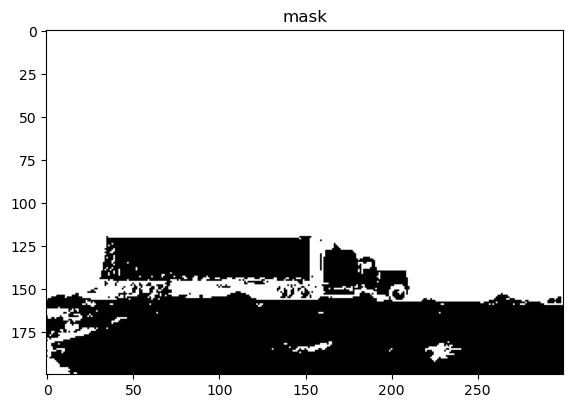

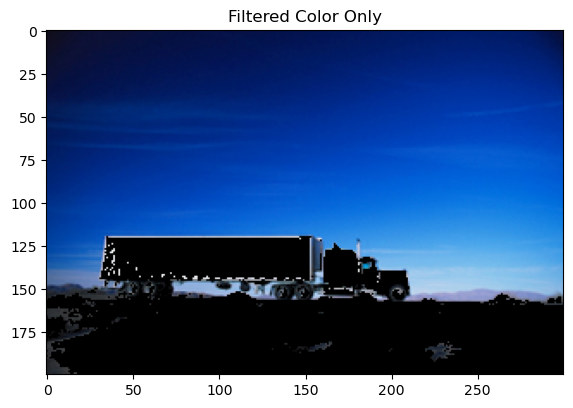

In [6]:
image = cv2.imread('images/truck.jpg')

# define range of BLUE color in HSV
lower = np.array([90,0,0])
upper = np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)  
imshow('mask', mask)
imshow('Filtered Color Only', res)

#### **Filtering out Red**


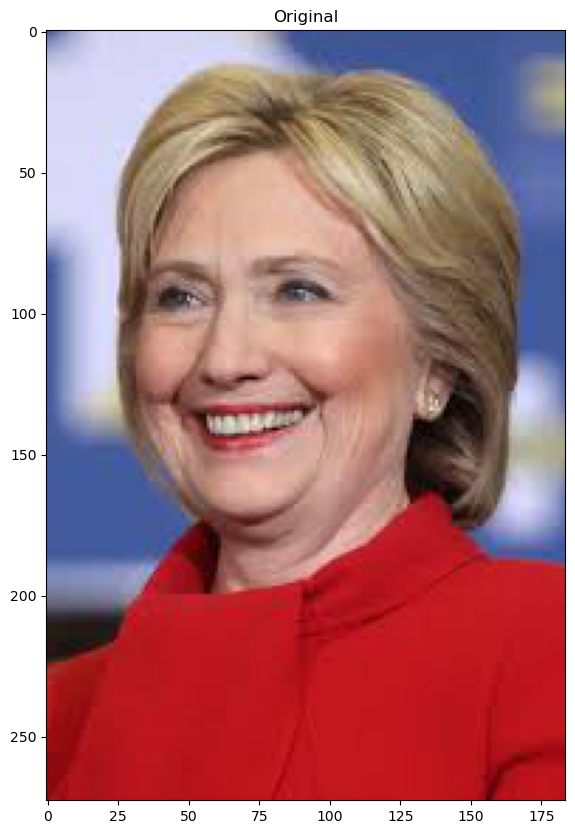

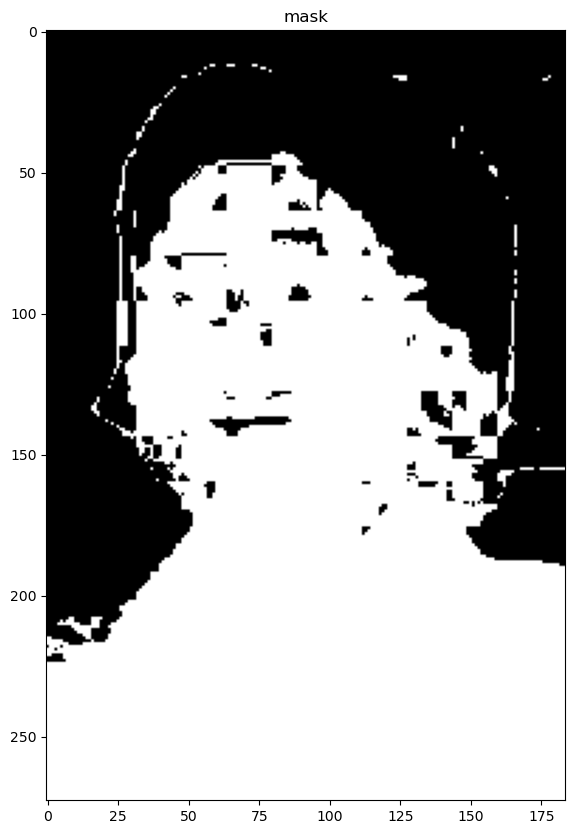

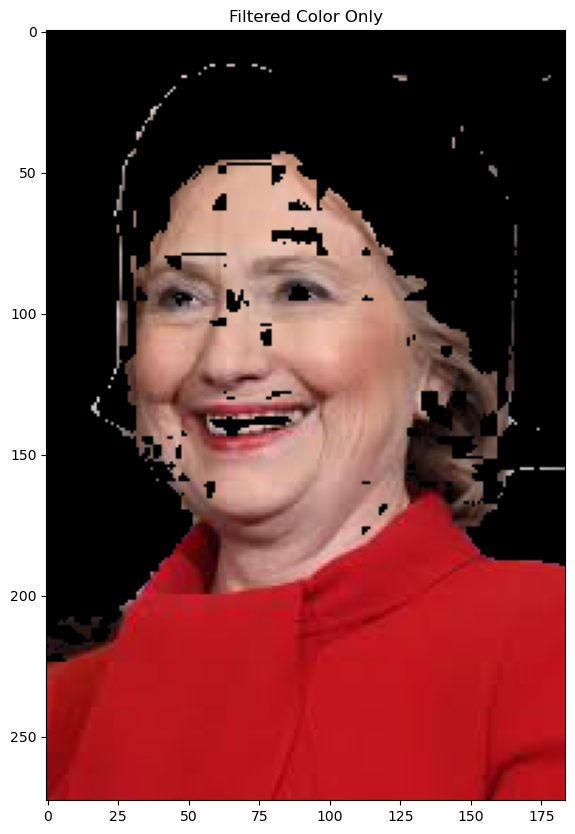

In [7]:
image = cv2.imread("./images/Hillary.jpg")

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,0,0])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join masks
mask = mask0+mask1

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)  
imshow('mask', mask)
imshow('Filtered Color Only', res)